In [132]:
import pandas as pd

train = pd.read_csv('../data/train.csv',sep='|')
test_set = pd.read_csv('../data/test.csv',sep='|')

print(train.shape)
print(test_set.shape)

(1879, 10)
(498121, 9)


In [133]:
# train = train[train['trustLevel'] <= 2]
# print(train.shape)

# test_set = test_set[test_set['trustLevel'] <= 2]
# test_set.shape

In [134]:
train.columns

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')

# Feature Engineering

In [135]:
train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']

# train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
# train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
# train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']

# train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
# train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
# train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
# train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
# train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
# train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
# train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

In [136]:
# def group_trust(row):
#     if row['trustLevel'] >= 3:
#         val = 'high'
#     elif row['trustLevel'] < 3:
#         val = 'low'
#     return val

# train['trust'] = train.apply(group_trust, axis=1)
# # train[train['trust'] == 'high'] 
# train['trust']

In [137]:
train['trust'] = np.where(train['trustLevel']>=3, 0, 1)

### valuePerSecond = grandTotal / totalScanTimeInSeconds

### lineItemVoidsPerPosition  = lineItemVoids / scannedLineItems

In [138]:
#train['grandPerSecond'] = train['grandTotal'] / train['totalScanTimeInSeconds']
#train[['valuePerSecond', 'grandPerSecond']]

In [139]:
# fraud = train[train['fraud'] == 1]

# fraud.head(50)[['totalScanTimeInSeconds', 'scannedLineItems', 'lineItemVoids', 'scansWithoutRegistration',
#                 'quantityModifications', 'grandTotal', 'fraud']]

In [140]:
# fil = (train['fraud'] == 0) & (train['trustLevel'] <= 2)
# non_fraud = train[fil]
# non_fraud.head(50)[['totalScanTimeInSeconds', 'scannedLineItems', 'lineItemVoids', 'scansWithoutRegistration',
#                 'quantityModifications', 'grandTotal', 'fraud']]

In [141]:
test_set['scannedLineItems'] = test_set['scannedLineItemsPerSecond'] * test_set['totalScanTimeInSeconds']
test_set['trust'] = np.where(test_set['trustLevel']>=3, 0, 1)

In [142]:
fraud = train[train['fraud'] == 1]
non_fraud = train[train['fraud'] == 0] 

fraud = fraud.drop(['fraud', 'trustLevel'],axis=1)
non_fraud = non_fraud.drop(['fraud', 'trustLevel'],axis=1)

test_set = test_set.drop('trustLevel', axis=1)

In [143]:
test_set.columns == fraud.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [144]:
test_set.columns == non_fraud.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


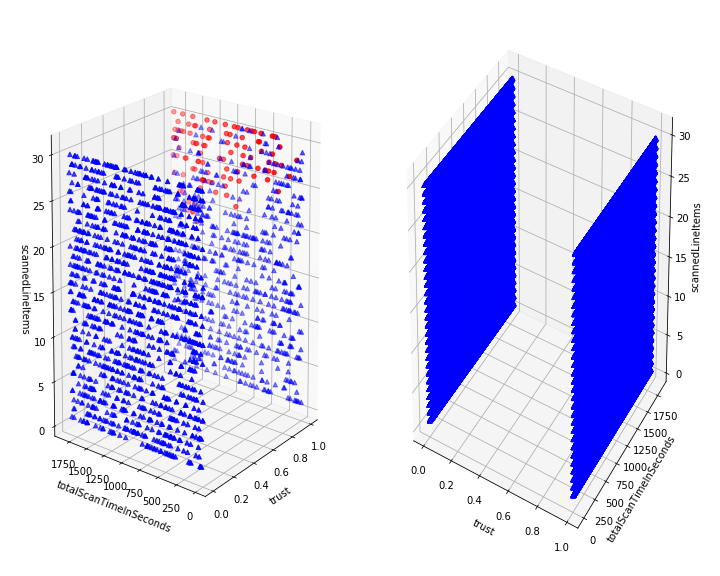

<IPython.core.display.Javascript object>


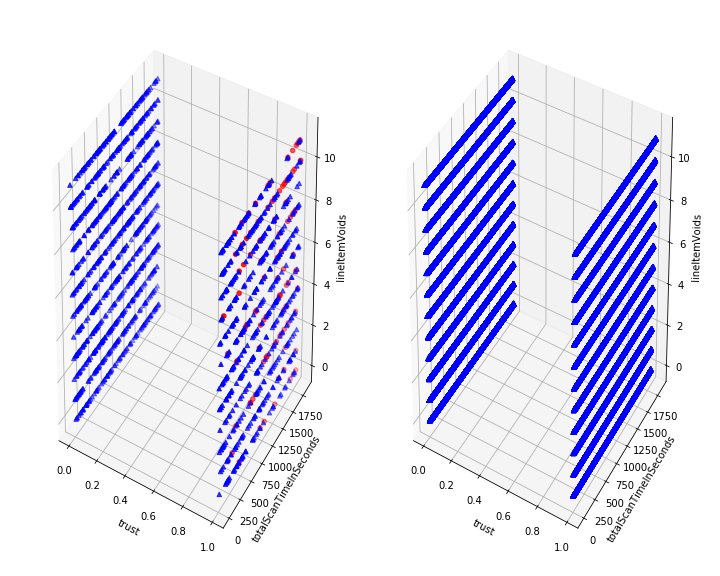

<IPython.core.display.Javascript object>


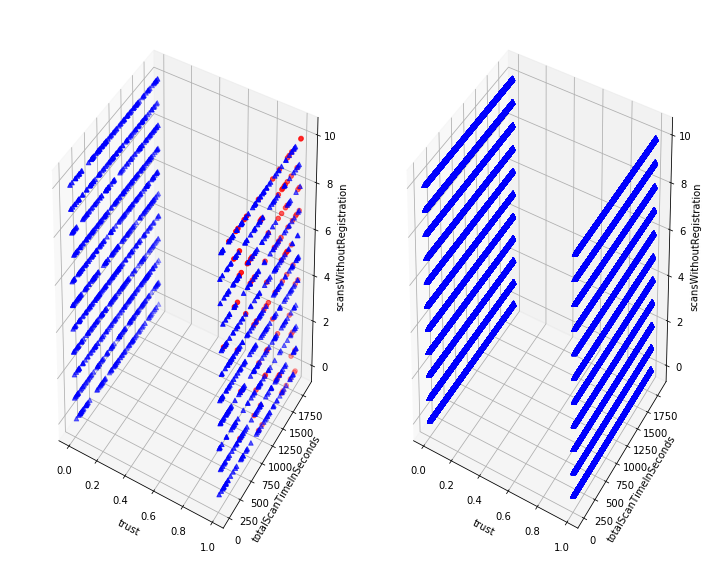

<IPython.core.display.Javascript object>


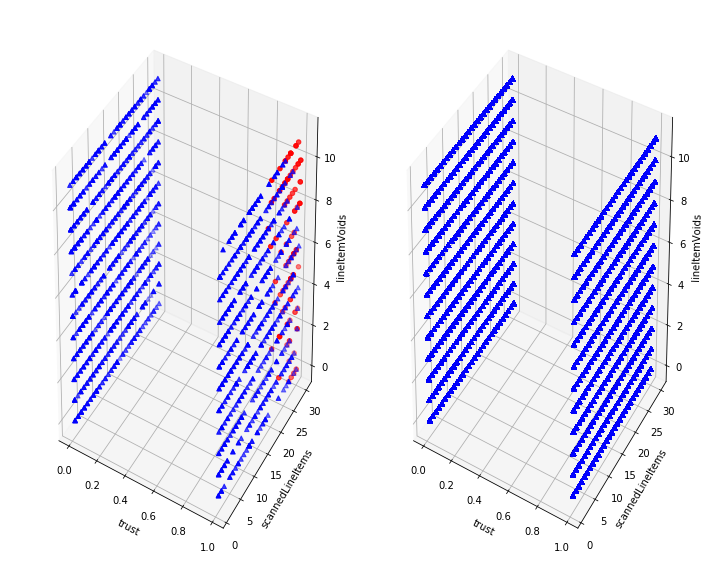

<IPython.core.display.Javascript object>


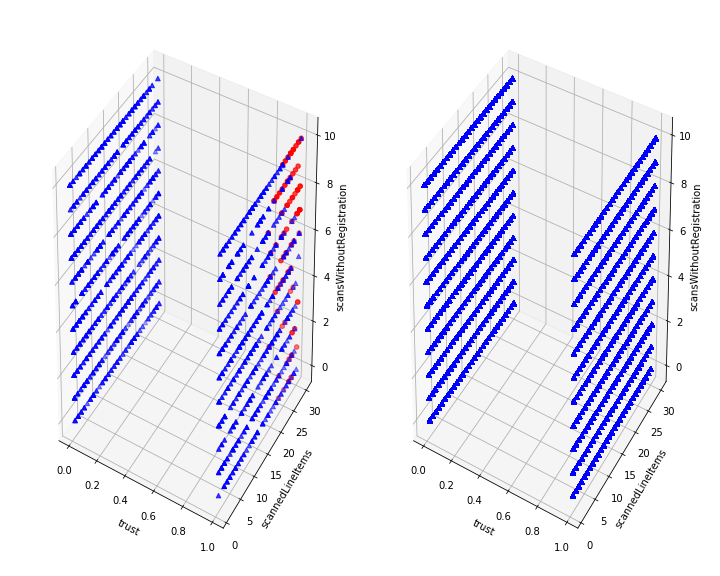

<IPython.core.display.Javascript object>


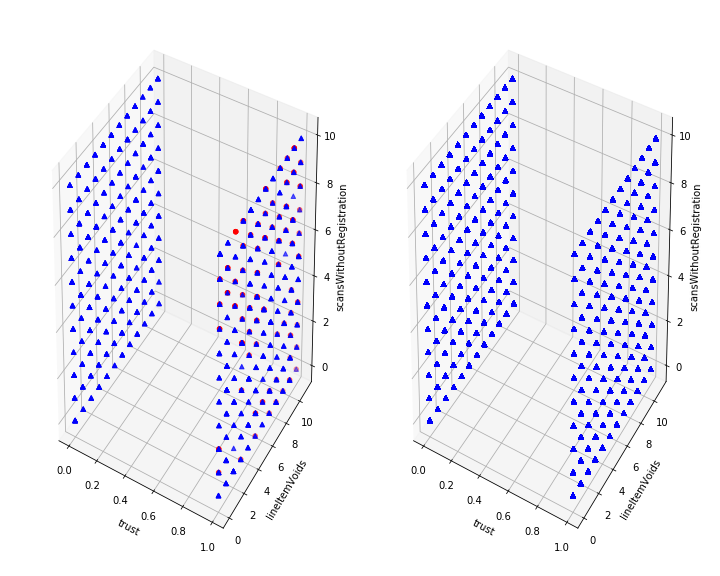

<IPython.core.display.Javascript object>


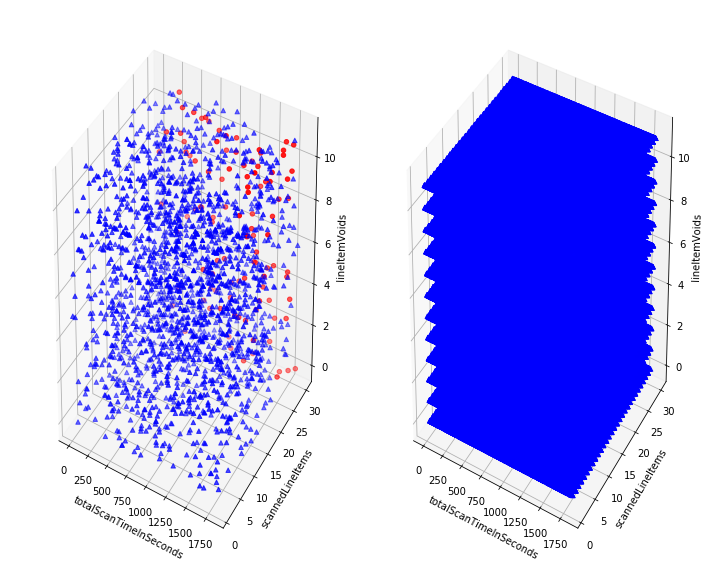

<IPython.core.display.Javascript object>


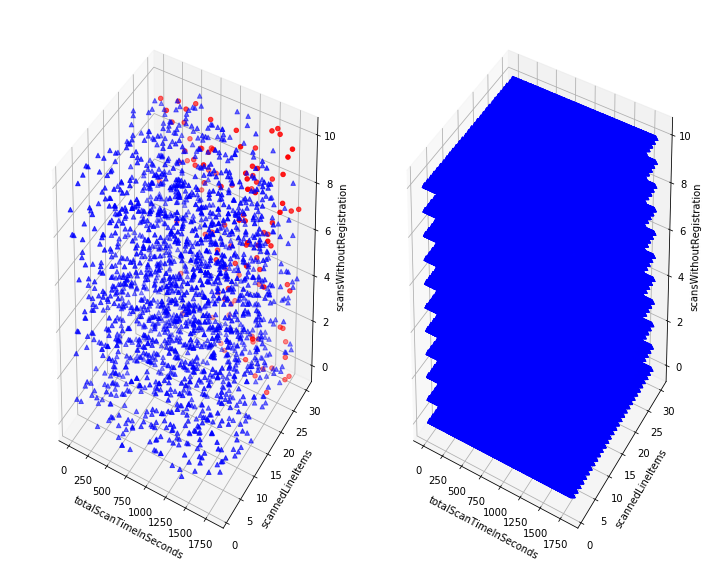

<IPython.core.display.Javascript object>


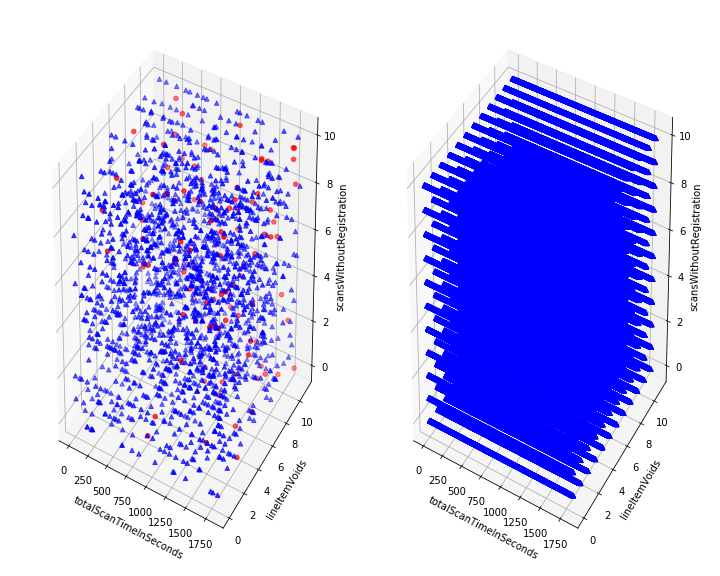

<IPython.core.display.Javascript object>


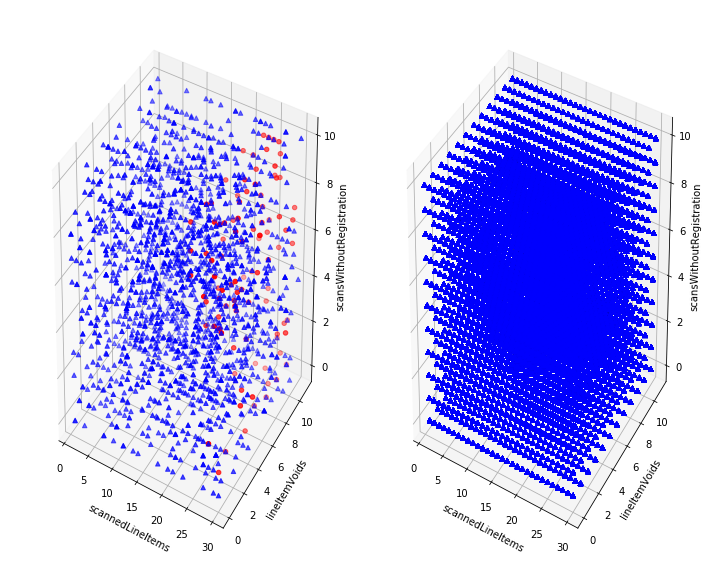

In [145]:
%matplotlib inline  
%matplotlib notebook
%pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import itertools

columns = ['trust', 'totalScanTimeInSeconds', 'scannedLineItems', 'lineItemVoids', 'scansWithoutRegistration',
               # 'quantityModifications', 'grandTotal'
          ]

for subset in itertools.combinations(columns, 3):
      
    # training set
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(121, projection='3d')

    X_fraud = fraud[subset[0]]
    Y_fraud = fraud[subset[1]]
    Z_fraud = fraud[subset[2]]

    X_non_fraud = non_fraud[subset[0]]
    Y_non_fraud = non_fraud[subset[1]]
    Z_non_fraud = non_fraud[subset[2]]

    ax.scatter(X_fraud,Y_fraud,Z_fraud, c='r', marker='o')
    ax.scatter(X_non_fraud,Y_non_fraud,Z_non_fraud, c='b', marker='^')

    ax.set_xlabel(subset[0])
    ax.set_ylabel(subset[1])
    ax.set_zlabel(subset[2])
    
    # test set
    ax_test = fig.add_subplot(122, projection='3d')

    X_test = test_set[subset[0]]
    Y_test = test_set[subset[1]]
    Z_test = test_set[subset[2]]

    ax_test.scatter(X_test,Y_test,Z_test, c='b', marker='^')

    ax_test.set_xlabel(subset[0])
    ax_test.set_ylabel(subset[1])
    ax_test.set_zlabel(subset[2])
    
    plt.tight_layout()
    plt.show()

In [146]:
# %matplotlib inline  
# %matplotlib notebook
# %pylab

# fig = plt.figure(figsize=(10,8))
# ax_test = fig.add_subplot(111, projection='3d')

# X_test = test_set['lineItemVoids']
# Y_test = test_set['totalScanTimeInSeconds']
# Z_test = test_set['grandTotal']

# ax_test.scatter(X_test,Y_test,Z_test, c='b', marker='o')

# ax_test.set_xlabel('lineItemVoids')
# ax_test.set_ylabel('totalScanTimeInSeconds')
# ax_test.set_zlabel('grandTotal')

# plt.show()
